In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

In [33]:
data_train_path = 'Fruits_data/train'
data_test_path = 'Fruits_data/test'
data_val_path = 'Fruits_data/validation'

In [34]:
img_width = 180
img_height = 180

In [35]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [36]:
data_cat = data_train.class_names
print(data_cat)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [37]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [38]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                       shuffle=False,
                                                       image_size=(img_width, img_height),
                                                       batch_size=32,
                                                       validation_split=False)

Found 359 files belonging to 36 classes.


2025-01-22 04:27:33.803343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 04:27:34.979567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


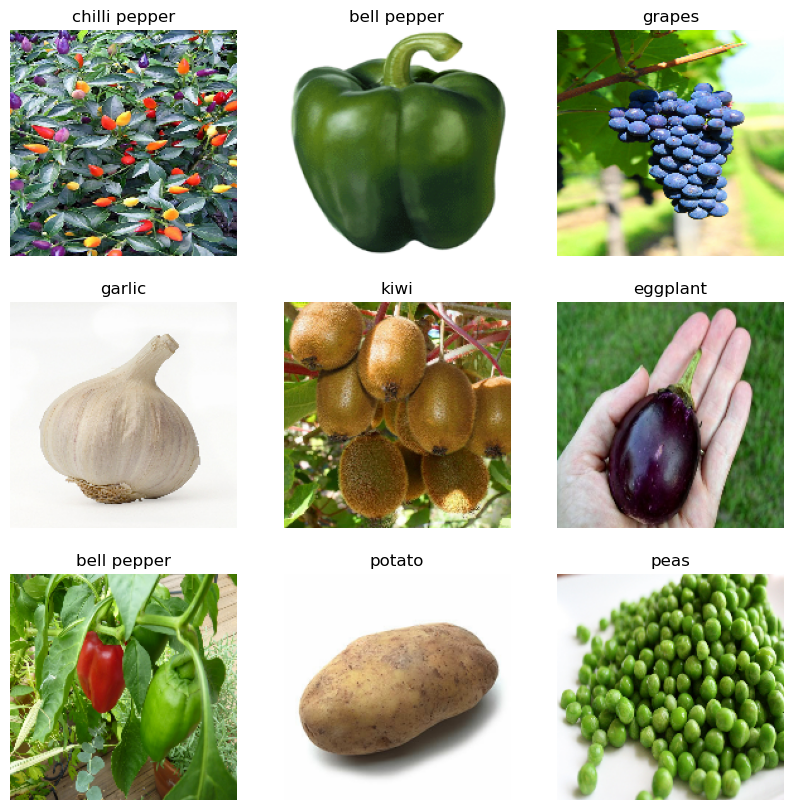

In [44]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i].numpy()])
        plt.axis('off')

In [45]:
from tensorflow.keras.models import Sequential

In [46]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [49]:
model = Sequential([ # Create a sequential neural network.
                   layers.Rescaling(1./255), # Normalize pixel values from 0-255 to 0-1.
                   layers.Conv2D(16, 3, padding='same', activation='relu'), # Convolutional layer with 16 filters, 3x3 size, ReLU activation.
                   layers.MaxPooling2D(), # Reduce feature map size by taking max value in a small window.
                   layers.Conv2D(32, 3, padding='same', activation='relu'), # Convolutional layer with 32 filters, 3x3 size, ReLU activation.
                   layers.MaxPooling2D(), # Downsize feature maps again.
                   layers.Conv2D(64, 2, padding='same', activation='relu'), # Convolutional layer with 64 filters, 2x2 size, ReLU activation.
                   layers.MaxPooling2D(), # Further reduce feature map size.
                   layers.Flatten(), # Flatten 2D feature maps into a 1D array.
                   layers.Dropout(0.2), # Drop 20% of neurons to prevent overfitting.
                   layers.Dense(128), # Fully connected layer with 128 neurons.
                   layers.Dense(len(data_cat)) # Output layer with `len(data_cat)` neurons for classification.
                   ])

In [50]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [52]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2025-01-22 05:08:12.308332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:08:13.978957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:04 - loss: 4.7909 - accuracy: 0.0234

2025-01-22 05:08:18.590179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 2:02 - loss: 4.2814 - accuracy: 0.0278

2025-01-22 05:08:25.402766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:08:26.244228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:49 - loss: 4.0678 - accuracy: 0.0385

2025-01-22 05:08:30.171177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:48 - loss: 3.9064 - accuracy: 0.0411

2025-01-22 05:08:39.680916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:46 - loss: 3.8409 - accuracy: 0.0394

2025-01-22 05:08:45.603309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:44 - loss: 3.8289 - accuracy: 0.0391

2025-01-22 05:08:47.617616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:43 - loss: 3.7691 - accuracy: 0.0528

2025-01-22 05:08:56.945721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:42 - loss: 3.7359 - accuracy: 0.0576

2025-01-22 05:09:03.457559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:38 - loss: 3.7080 - accuracy: 0.0589

2025-01-22 05:09:08.005930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:36 - loss: 3.6726 - accuracy: 0.0633

2025-01-22 05:09:14.314213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:31 - loss: 3.6399 - accuracy: 0.0662

2025-01-22 05:09:21.940054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:28 - loss: 3.6131 - accuracy: 0.0674

2025-01-22 05:09:30.499453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:21 - loss: 3.5790 - accuracy: 0.0712

2025-01-22 05:09:38.842030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:19 - loss: 3.5693 - accuracy: 0.0735

2025-01-22 05:09:40.189754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 1:12 - loss: 3.5361 - accuracy: 0.0733

2025-01-22 05:09:47.912912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 1:06 - loss: 3.5056 - accuracy: 0.0789

2025-01-22 05:09:54.743805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 58s - loss: 3.4579 - accuracy: 0.0859

2025-01-22 05:10:03.409973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 47s - loss: 3.4186 - accuracy: 0.0897

2025-01-22 05:10:12.178108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 45s - loss: 3.4151 - accuracy: 0.0898

2025-01-22 05:10:14.623075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 36s - loss: 3.3712 - accuracy: 0.0978

2025-01-22 05:10:28.804648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.2358 - accuracy: 0.1230

2025-01-22 05:11:05.581989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:11:08.691608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 191s 2s/step - loss: 3.2358 - accuracy: 0.1230 - val_loss: 2.1268 - val_accuracy: 0.3846
Epoch 2/25


2025-01-22 05:11:22.774634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 18:33 - loss: 2.6529 - accuracy: 0.2500

2025-01-22 05:11:25.838696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 3:05 - loss: 2.6400 - accuracy: 0.2344

2025-01-22 05:11:32.984218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 2:22 - loss: 2.5130 - accuracy: 0.2882

2025-01-22 05:11:38.619012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:11:39.440671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 2:03 - loss: 2.5492 - accuracy: 0.2788

2025-01-22 05:11:43.351557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:10 - loss: 2.5939 - accuracy: 0.2664

2025-01-22 05:11:56.154238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:14 - loss: 2.5440 - accuracy: 0.2745

2025-01-22 05:12:05.395514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:14 - loss: 2.5509 - accuracy: 0.2721

2025-01-22 05:12:08.790814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 2:06 - loss: 2.4822 - accuracy: 0.2920

2025-01-22 05:12:17.356933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 2:01 - loss: 2.4542 - accuracy: 0.2969

2025-01-22 05:12:23.823170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:54 - loss: 2.4360 - accuracy: 0.2973

2025-01-22 05:12:28.136598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:50 - loss: 2.4120 - accuracy: 0.3043

2025-01-22 05:12:34.136097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:43 - loss: 2.4008 - accuracy: 0.3088

2025-01-22 05:12:41.719474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 1:37 - loss: 2.3834 - accuracy: 0.3200

2025-01-22 05:12:50.031537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:27 - loss: 2.3545 - accuracy: 0.3300

2025-01-22 05:12:56.072315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:24 - loss: 2.3525 - accuracy: 0.3297

2025-01-22 05:12:57.309243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 1:16 - loss: 2.3504 - accuracy: 0.3273

2025-01-22 05:13:04.990040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 1:09 - loss: 2.3418 - accuracy: 0.3257

2025-01-22 05:13:10.909322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:01 - loss: 2.3206 - accuracy: 0.3311

2025-01-22 05:13:20.983596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 49s - loss: 2.2981 - accuracy: 0.3375

2025-01-22 05:13:29.017534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 47s - loss: 2.2948 - accuracy: 0.3385

2025-01-22 05:13:30.954549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 37s - loss: 2.2949 - accuracy: 0.3413

2025-01-22 05:13:42.445310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.2324 - accuracy: 0.3612

2025-01-22 05:14:17.679433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:14:21.387383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 192s 2s/step - loss: 2.2324 - accuracy: 0.3612 - val_loss: 1.2791 - val_accuracy: 0.6467
Epoch 3/25


2025-01-22 05:14:33.881446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 15:14 - loss: 1.8068 - accuracy: 0.4688

2025-01-22 05:14:35.745848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:22 - loss: 1.6690 - accuracy: 0.4922

2025-01-22 05:14:41.107961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 2:09 - loss: 1.8193 - accuracy: 0.4688

2025-01-22 05:14:47.820494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/98 [==>...........................] - ETA: 2:08 - loss: 1.8280 - accuracy: 0.4594

2025-01-22 05:14:48.838866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 2:08 - loss: 1.8112 - accuracy: 0.4712

2025-01-22 05:14:55.181322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:16 - loss: 1.7647 - accuracy: 0.4786

2025-01-22 05:15:07.456265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 2:17 - loss: 1.7659 - accuracy: 0.4830

2025-01-22 05:15:15.427703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:13 - loss: 1.7663 - accuracy: 0.4857

2025-01-22 05:15:17.975564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 2:02 - loss: 1.7765 - accuracy: 0.4806

2025-01-22 05:15:26.064363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:56 - loss: 1.7638 - accuracy: 0.4805

2025-01-22 05:15:31.407032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:48 - loss: 1.7631 - accuracy: 0.4848

2025-01-22 05:15:34.710585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:42 - loss: 1.7395 - accuracy: 0.4910

2025-01-22 05:15:39.437872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:34 - loss: 1.7222 - accuracy: 0.4940

2025-01-22 05:15:44.993720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:29 - loss: 1.6952 - accuracy: 0.5007

2025-01-22 05:15:52.575550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:19 - loss: 1.6621 - accuracy: 0.5147

2025-01-22 05:16:00.640550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:16:02.061408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 1:12 - loss: 1.6413 - accuracy: 0.5188

2025-01-22 05:16:10.340546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 1:06 - loss: 1.6227 - accuracy: 0.5270

2025-01-22 05:16:15.820928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 57s - loss: 1.6108 - accuracy: 0.5312

2025-01-22 05:16:22.876108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 46s - loss: 1.6003 - accuracy: 0.5353

2025-01-22 05:16:29.475124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 44s - loss: 1.5933 - accuracy: 0.5383

2025-01-22 05:16:32.057675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 34s - loss: 1.5948 - accuracy: 0.5398

2025-01-22 05:16:41.736410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.5551 - accuracy: 0.5493

2025-01-22 05:17:13.824416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:17:16.618045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 174s 2s/step - loss: 1.5551 - accuracy: 0.5493 - val_loss: 0.7886 - val_accuracy: 0.8120
Epoch 4/25


2025-01-22 05:17:27.437662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:17:29.103251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:06 - loss: 1.1321 - accuracy: 0.6875

2025-01-22 05:17:33.528728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:49 - loss: 1.1093 - accuracy: 0.6944

2025-01-22 05:17:39.176107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:17:39.938273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:40 - loss: 1.1182 - accuracy: 0.6923

2025-01-22 05:17:43.849431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:39 - loss: 1.0595 - accuracy: 0.7007

2025-01-22 05:17:52.264406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:38 - loss: 1.0373 - accuracy: 0.7031

2025-01-22 05:17:57.657540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:36 - loss: 1.0130 - accuracy: 0.7070

2025-01-22 05:17:59.621313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:29 - loss: 1.0111 - accuracy: 0.7112

2025-01-22 05:18:05.953949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:27 - loss: 0.9843 - accuracy: 0.7207

2025-01-22 05:18:10.972040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.9883 - accuracy: 0.7223

2025-01-22 05:18:14.011949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:20 - loss: 0.9839 - accuracy: 0.7270

2025-01-22 05:18:19.173820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:15 - loss: 0.9675 - accuracy: 0.7307

2025-01-22 05:18:24.835657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:12 - loss: 0.9636 - accuracy: 0.7312

2025-01-22 05:18:30.835416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:05 - loss: 0.9455 - accuracy: 0.7381

2025-01-22 05:18:36.611037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:03 - loss: 0.9449 - accuracy: 0.7359

2025-01-22 05:18:37.841780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.9414 - accuracy: 0.7364

2025-01-22 05:18:43.462679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 52s - loss: 0.9388 - accuracy: 0.7378

2025-01-22 05:18:47.925819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 43s - loss: 0.9327 - accuracy: 0.7389

2025-01-22 05:18:54.397041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.9315 - accuracy: 0.7402

2025-01-22 05:19:00.565821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.9335 - accuracy: 0.7390

2025-01-22 05:19:02.521641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.9308 - accuracy: 0.7419

2025-01-22 05:19:10.778845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.8883 - accuracy: 0.7554

2025-01-22 05:19:35.846585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:19:38.161497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 141s 1s/step - loss: 0.8883 - accuracy: 0.7554 - val_loss: 0.3398 - val_accuracy: 0.9231
Epoch 5/25


2025-01-22 05:19:48.215331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:19:49.759967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 1:59 - loss: 0.5403 - accuracy: 0.8906

2025-01-22 05:19:54.237117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:52 - loss: 0.5303 - accuracy: 0.8681

2025-01-22 05:20:00.185368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:20:00.951917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:43 - loss: 0.5020 - accuracy: 0.8630

2025-01-22 05:20:04.611146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:40 - loss: 0.4924 - accuracy: 0.8668

2025-01-22 05:20:13.280968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:39 - loss: 0.4749 - accuracy: 0.8665

2025-01-22 05:20:18.522143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:37 - loss: 0.4662 - accuracy: 0.8711

2025-01-22 05:20:20.688759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.4578 - accuracy: 0.8696

2025-01-22 05:20:26.779186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.4497 - accuracy: 0.8691

2025-01-22 05:20:31.378986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.4428 - accuracy: 0.8723

2025-01-22 05:20:34.484574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.4321 - accuracy: 0.8775

2025-01-22 05:20:39.130492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.4247 - accuracy: 0.8787

2025-01-22 05:20:44.947459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:11 - loss: 0.4283 - accuracy: 0.8764

2025-01-22 05:20:50.730756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.4247 - accuracy: 0.8750

2025-01-22 05:20:56.444848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.4218 - accuracy: 0.8762

2025-01-22 05:20:57.626825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.4265 - accuracy: 0.8767

2025-01-22 05:21:03.338543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.4344 - accuracy: 0.8724

2025-01-22 05:21:07.755848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 45s - loss: 0.4376 - accuracy: 0.8701

2025-01-22 05:21:15.612190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.4404 - accuracy: 0.8705

2025-01-22 05:21:21.789043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.4361 - accuracy: 0.8719

2025-01-22 05:21:23.653300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.4323 - accuracy: 0.8726

2025-01-22 05:21:31.928316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.8806

2025-01-22 05:21:57.475579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:21:59.768519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.4255 - accuracy: 0.8806 - val_loss: 0.3318 - val_accuracy: 0.9573
Epoch 6/25


2025-01-22 05:22:09.972604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:22:11.543065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:03 - loss: 0.2068 - accuracy: 0.9531

2025-01-22 05:22:15.767585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:46 - loss: 0.2727 - accuracy: 0.9236

2025-01-22 05:22:21.350671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:22:22.127491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 1:42 - loss: 0.2733 - accuracy: 0.9219

2025-01-22 05:22:25.701573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:38 - loss: 0.2415 - accuracy: 0.9326

2025-01-22 05:22:34.442599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:38 - loss: 0.2382 - accuracy: 0.9347

2025-01-22 05:22:39.913647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:35 - loss: 0.2294 - accuracy: 0.9362

2025-01-22 05:22:42.040568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:29 - loss: 0.2109 - accuracy: 0.9429

2025-01-22 05:22:48.191747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:25 - loss: 0.2077 - accuracy: 0.9463

2025-01-22 05:22:52.686448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.2070 - accuracy: 0.9446

2025-01-22 05:22:55.734487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:18 - loss: 0.2083 - accuracy: 0.9457

2025-01-22 05:23:00.043050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:12 - loss: 0.2128 - accuracy: 0.9427

2025-01-22 05:23:05.277957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:09 - loss: 0.2112 - accuracy: 0.9438

2025-01-22 05:23:11.330270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:03 - loss: 0.2014 - accuracy: 0.9475

2025-01-22 05:23:17.125718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:01 - loss: 0.1989 - accuracy: 0.9485

2025-01-22 05:23:18.320491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.1975 - accuracy: 0.9466

2025-01-22 05:23:23.976482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.2103 - accuracy: 0.9449

2025-01-22 05:23:28.140532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.2166 - accuracy: 0.9434

2025-01-22 05:23:34.376431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.2145 - accuracy: 0.9438

2025-01-22 05:23:41.415208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.2182 - accuracy: 0.9428

2025-01-22 05:23:43.270602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.2268 - accuracy: 0.9424

2025-01-22 05:23:51.479611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.2289 - accuracy: 0.9438

2025-01-22 05:24:16.701391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:24:18.998355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 140s 1s/step - loss: 0.2289 - accuracy: 0.9438 - val_loss: 0.2254 - val_accuracy: 0.9573
Epoch 7/25


2025-01-22 05:24:29.533536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:24:31.130935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:00 - loss: 0.2122 - accuracy: 0.9609

2025-01-22 05:24:35.545584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:48 - loss: 0.1754 - accuracy: 0.9653

2025-01-22 05:24:41.290609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:24:42.014453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:41 - loss: 0.2124 - accuracy: 0.9447

2025-01-22 05:24:45.610793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:38 - loss: 0.1726 - accuracy: 0.9556

2025-01-22 05:24:54.138248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:37 - loss: 0.1850 - accuracy: 0.9574

2025-01-22 05:24:59.438480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:35 - loss: 0.1775 - accuracy: 0.9583

2025-01-22 05:25:01.813552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.1611 - accuracy: 0.9623

2025-01-22 05:25:08.289731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:27 - loss: 0.1624 - accuracy: 0.9600

2025-01-22 05:25:12.995289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.1554 - accuracy: 0.9616

2025-01-22 05:25:16.068009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.1558 - accuracy: 0.9605

2025-01-22 05:25:20.562973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.1490 - accuracy: 0.9628

2025-01-22 05:25:25.843502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:11 - loss: 0.1437 - accuracy: 0.9646

2025-01-22 05:25:32.024005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.1471 - accuracy: 0.9650

2025-01-22 05:25:37.541151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.1470 - accuracy: 0.9651

2025-01-22 05:25:38.842455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.1463 - accuracy: 0.9653

2025-01-22 05:25:44.628406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.1486 - accuracy: 0.9656

2025-01-22 05:25:48.699179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 43s - loss: 0.1505 - accuracy: 0.9659

2025-01-22 05:25:55.480937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.1503 - accuracy: 0.9661

2025-01-22 05:26:01.595950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.1496 - accuracy: 0.9661

2025-01-22 05:26:03.529285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.1659 - accuracy: 0.9635

2025-01-22 05:26:12.697563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1605 - accuracy: 0.9657

2025-01-22 05:26:38.740480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:26:40.993621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.1605 - accuracy: 0.9657 - val_loss: 0.2507 - val_accuracy: 0.9573
Epoch 8/25


2025-01-22 05:26:51.458063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:26:53.013931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:01 - loss: 0.0736 - accuracy: 0.9844

2025-01-22 05:26:57.404102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:47 - loss: 0.1189 - accuracy: 0.9792

2025-01-22 05:27:02.912333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:27:03.701977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 1:42 - loss: 0.1248 - accuracy: 0.9792

2025-01-22 05:27:07.283409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:38 - loss: 0.1345 - accuracy: 0.9720

2025-01-22 05:27:16.124565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:38 - loss: 0.1223 - accuracy: 0.9744

2025-01-22 05:27:21.338804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:35 - loss: 0.1253 - accuracy: 0.9727

2025-01-22 05:27:23.423786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:29 - loss: 0.1164 - accuracy: 0.9741

2025-01-22 05:27:29.744164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:25 - loss: 0.1085 - accuracy: 0.9766

2025-01-22 05:27:34.253354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.1077 - accuracy: 0.9777

2025-01-22 05:27:37.419285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:18 - loss: 0.1062 - accuracy: 0.9778

2025-01-22 05:27:41.750801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:13 - loss: 0.1039 - accuracy: 0.9777

2025-01-22 05:27:47.113904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0995 - accuracy: 0.9785

2025-01-22 05:27:52.907657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:03 - loss: 0.0999 - accuracy: 0.9781

2025-01-22 05:27:58.610276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:01 - loss: 0.1018 - accuracy: 0.9779

2025-01-22 05:28:00.031833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.1069 - accuracy: 0.9778

2025-01-22 05:28:05.606121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.1120 - accuracy: 0.9778

2025-01-22 05:28:09.919453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.1164 - accuracy: 0.9775

2025-01-22 05:28:16.285367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.1202 - accuracy: 0.9781

2025-01-22 05:28:23.419256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.1187 - accuracy: 0.9784

2025-01-22 05:28:25.346049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.1227 - accuracy: 0.9781

2025-01-22 05:28:34.435908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1293 - accuracy: 0.9769

2025-01-22 05:28:59.871271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:29:02.136634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 141s 1s/step - loss: 0.1293 - accuracy: 0.9769 - val_loss: 0.2264 - val_accuracy: 0.9630
Epoch 9/25


2025-01-22 05:29:12.312207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:29:13.909689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:01 - loss: 0.1529 - accuracy: 0.9766

2025-01-22 05:29:18.162396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:45 - loss: 0.0979 - accuracy: 0.9792

2025-01-22 05:29:23.801100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:29:24.510213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:38 - loss: 0.0814 - accuracy: 0.9832

2025-01-22 05:29:28.164923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:37 - loss: 0.0768 - accuracy: 0.9868

2025-01-22 05:29:36.741489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:37 - loss: 0.0712 - accuracy: 0.9886

2025-01-22 05:29:42.186076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:35 - loss: 0.0679 - accuracy: 0.9896

2025-01-22 05:29:44.323002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:29 - loss: 0.0687 - accuracy: 0.9860

2025-01-22 05:29:50.676485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:25 - loss: 0.0653 - accuracy: 0.9873

2025-01-22 05:29:55.061314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:20 - loss: 0.0660 - accuracy: 0.9875

2025-01-22 05:29:58.152238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:18 - loss: 0.0654 - accuracy: 0.9877

2025-01-22 05:30:02.465427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:12 - loss: 0.0653 - accuracy: 0.9874

2025-01-22 05:30:07.696077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:09 - loss: 0.0627 - accuracy: 0.9882

2025-01-22 05:30:13.519513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:03 - loss: 0.0688 - accuracy: 0.9862

2025-01-22 05:30:19.153653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:01 - loss: 0.0680 - accuracy: 0.9865

2025-01-22 05:30:20.428739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.0805 - accuracy: 0.9847

2025-01-22 05:30:26.199998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 50s - loss: 0.0874 - accuracy: 0.9825

2025-01-22 05:30:30.571349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.0993 - accuracy: 0.9814

2025-01-22 05:30:37.540382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.1012 - accuracy: 0.9812

2025-01-22 05:30:43.752725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.1020 - accuracy: 0.9806

2025-01-22 05:30:45.923038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


78/98 [======================>.......] - ETA: 25s - loss: 0.1203 - accuracy: 0.9796

2025-01-22 05:30:54.207656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1191 - accuracy: 0.9795

2025-01-22 05:31:22.083230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:31:24.386500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.1191 - accuracy: 0.9795 - val_loss: 0.2516 - val_accuracy: 0.9487
Epoch 10/25


2025-01-22 05:31:34.769626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:44 - loss: 0.0268 - accuracy: 1.0000

2025-01-22 05:31:36.749227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:07 - loss: 0.0664 - accuracy: 0.9922

2025-01-22 05:31:41.006694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:48 - loss: 0.0577 - accuracy: 0.9931

2025-01-22 05:31:46.524416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:31:47.363629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 1:43 - loss: 0.0496 - accuracy: 0.9948

2025-01-22 05:31:50.890426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:38 - loss: 0.0872 - accuracy: 0.9885

2025-01-22 05:31:59.530921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:38 - loss: 0.0811 - accuracy: 0.9864

2025-01-22 05:32:05.558818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:37 - loss: 0.0794 - accuracy: 0.9870

2025-01-22 05:32:07.567979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.0701 - accuracy: 0.9881

2025-01-22 05:32:13.781939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:27 - loss: 0.0710 - accuracy: 0.9863

2025-01-22 05:32:18.430102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.0758 - accuracy: 0.9848

2025-01-22 05:32:21.653810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:20 - loss: 0.0708 - accuracy: 0.9860

2025-01-22 05:32:26.293108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.0691 - accuracy: 0.9866

2025-01-22 05:32:31.787195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:11 - loss: 0.0663 - accuracy: 0.9868

2025-01-22 05:32:37.736942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.0702 - accuracy: 0.9850

2025-01-22 05:32:43.286495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:03 - loss: 0.0728 - accuracy: 0.9847

2025-01-22 05:32:44.480538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.0785 - accuracy: 0.9841

2025-01-22 05:32:50.352656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 52s - loss: 0.0778 - accuracy: 0.9836

2025-01-22 05:32:54.640849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.0767 - accuracy: 0.9844

2025-01-22 05:33:00.958134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.0829 - accuracy: 0.9835

2025-01-22 05:33:07.296671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0819 - accuracy: 0.9837

2025-01-22 05:33:09.200539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0869 - accuracy: 0.9842

2025-01-22 05:33:17.814626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0998 - accuracy: 0.9836

2025-01-22 05:33:43.104446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:33:45.392580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 141s 1s/step - loss: 0.0998 - accuracy: 0.9836 - val_loss: 0.2531 - val_accuracy: 0.9487
Epoch 11/25


2025-01-22 05:33:55.634319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 12:52 - loss: 0.1506 - accuracy: 0.9688

2025-01-22 05:33:57.367760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:06 - loss: 0.1324 - accuracy: 0.9688

2025-01-22 05:34:01.782609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:48 - loss: 0.0867 - accuracy: 0.9826

2025-01-22 05:34:07.038494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:34:07.814066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:41 - loss: 0.0970 - accuracy: 0.9784

2025-01-22 05:34:11.639495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:39 - loss: 0.1017 - accuracy: 0.9786

2025-01-22 05:34:20.266558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:38 - loss: 0.0914 - accuracy: 0.9815

2025-01-22 05:34:25.653064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:36 - loss: 0.0848 - accuracy: 0.9831

2025-01-22 05:34:27.627214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:29 - loss: 0.0761 - accuracy: 0.9849

2025-01-22 05:34:33.917959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0706 - accuracy: 0.9863

2025-01-22 05:34:38.463224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.0714 - accuracy: 0.9857

2025-01-22 05:34:41.556221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:18 - loss: 0.0722 - accuracy: 0.9860

2025-01-22 05:34:45.792235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:13 - loss: 0.0672 - accuracy: 0.9874

2025-01-22 05:34:51.180611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0670 - accuracy: 0.9875

2025-01-22 05:34:57.000279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:03 - loss: 0.0689 - accuracy: 0.9869

2025-01-22 05:35:02.679172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:01 - loss: 0.0681 - accuracy: 0.9871

2025-01-22 05:35:04.042358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.0767 - accuracy: 0.9869

2025-01-22 05:35:09.618131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.0781 - accuracy: 0.9868

2025-01-22 05:35:13.919152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 42s - loss: 0.0756 - accuracy: 0.9870

2025-01-22 05:35:20.451967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.0750 - accuracy: 0.9862

2025-01-22 05:35:26.550558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0740 - accuracy: 0.9864

2025-01-22 05:35:28.892330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0753 - accuracy: 0.9870

2025-01-22 05:35:37.242237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9868

2025-01-22 05:36:02.547183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:36:04.880684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 139s 1s/step - loss: 0.0839 - accuracy: 0.9868 - val_loss: 0.2470 - val_accuracy: 0.9573
Epoch 12/25


2025-01-22 05:36:16.023405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:36:17.619378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:05 - loss: 0.0445 - accuracy: 0.9922

2025-01-22 05:36:21.977155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:48 - loss: 0.0785 - accuracy: 0.9826

2025-01-22 05:36:27.588841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:36:28.373681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:40 - loss: 0.0674 - accuracy: 0.9856

2025-01-22 05:36:32.281929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:42 - loss: 0.0617 - accuracy: 0.9868

2025-01-22 05:36:41.435171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:41 - loss: 0.0670 - accuracy: 0.9872

2025-01-22 05:36:47.226458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:39 - loss: 0.0624 - accuracy: 0.9883

2025-01-22 05:36:49.231568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:32 - loss: 0.0634 - accuracy: 0.9871

2025-01-22 05:36:55.608667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:28 - loss: 0.0591 - accuracy: 0.9883

2025-01-22 05:37:00.004058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:23 - loss: 0.0593 - accuracy: 0.9875

2025-01-22 05:37:03.285065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:20 - loss: 0.0567 - accuracy: 0.9885

2025-01-22 05:37:07.616821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:15 - loss: 0.0586 - accuracy: 0.9881

2025-01-22 05:37:12.919210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:11 - loss: 0.0588 - accuracy: 0.9882

2025-01-22 05:37:18.767385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.0710 - accuracy: 0.9875

2025-01-22 05:37:24.480091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:03 - loss: 0.0699 - accuracy: 0.9877

2025-01-22 05:37:25.757275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.0727 - accuracy: 0.9875

2025-01-22 05:37:32.309685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 52s - loss: 0.0737 - accuracy: 0.9878

2025-01-22 05:37:37.303270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 45s - loss: 0.0705 - accuracy: 0.9883

2025-01-22 05:37:43.500900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.0668 - accuracy: 0.9884

2025-01-22 05:37:49.678521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0660 - accuracy: 0.9886

2025-01-22 05:37:51.645915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


78/98 [======================>.......] - ETA: 26s - loss: 0.0810 - accuracy: 0.9876

2025-01-22 05:37:59.991551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9875

2025-01-22 05:38:25.189615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:38:27.459694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 143s 1s/step - loss: 0.0760 - accuracy: 0.9875 - val_loss: 0.3115 - val_accuracy: 0.9573
Epoch 13/25


2025-01-22 05:38:37.656256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:38:39.292268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:12 - loss: 0.0395 - accuracy: 0.9922

2025-01-22 05:38:43.728532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:49 - loss: 0.0473 - accuracy: 0.9896

2025-01-22 05:38:49.321300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:38:50.116812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:42 - loss: 0.0740 - accuracy: 0.9856

2025-01-22 05:38:54.031929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:39 - loss: 0.0657 - accuracy: 0.9885

2025-01-22 05:39:02.470157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:38 - loss: 0.0602 - accuracy: 0.9901

2025-01-22 05:39:07.846001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:36 - loss: 0.0580 - accuracy: 0.9896

2025-01-22 05:39:09.817830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:29 - loss: 0.0646 - accuracy: 0.9881

2025-01-22 05:39:16.098634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0604 - accuracy: 0.9893

2025-01-22 05:39:20.708098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.0708 - accuracy: 0.9857

2025-01-22 05:39:23.765500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:18 - loss: 0.0717 - accuracy: 0.9860

2025-01-22 05:39:28.129754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:13 - loss: 0.0679 - accuracy: 0.9874

2025-01-22 05:39:33.387308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0709 - accuracy: 0.9875

2025-01-22 05:39:39.196747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:03 - loss: 0.0755 - accuracy: 0.9844

2025-01-22 05:39:45.003562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:01 - loss: 0.0754 - accuracy: 0.9841

2025-01-22 05:39:46.172664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.0712 - accuracy: 0.9847

2025-01-22 05:39:51.681334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.0788 - accuracy: 0.9825

2025-01-22 05:39:56.745310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 43s - loss: 0.0821 - accuracy: 0.9817

2025-01-22 05:40:03.076883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.0852 - accuracy: 0.9808

2025-01-22 05:40:09.125843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0841 - accuracy: 0.9811

2025-01-22 05:40:11.135096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0875 - accuracy: 0.9813

2025-01-22 05:40:19.356318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0865 - accuracy: 0.9817

2025-01-22 05:40:45.314032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:40:47.914090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 140s 1s/step - loss: 0.0865 - accuracy: 0.9817 - val_loss: 0.2956 - val_accuracy: 0.9516
Epoch 14/25


2025-01-22 05:40:58.132390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:05 - loss: 0.0218 - accuracy: 1.0000

2025-01-22 05:40:59.804072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:04 - loss: 0.1350 - accuracy: 0.9766

2025-01-22 05:41:04.308461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:49 - loss: 0.0805 - accuracy: 0.9826

2025-01-22 05:41:09.733702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:41:10.520044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:48 - loss: 0.0720 - accuracy: 0.9832

2025-01-22 05:41:15.581770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:46 - loss: 0.0732 - accuracy: 0.9819

2025-01-22 05:41:24.497664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:44 - loss: 0.0644 - accuracy: 0.9844

2025-01-22 05:41:29.908182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:41 - loss: 0.0603 - accuracy: 0.9857

2025-01-22 05:41:31.903277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:34 - loss: 0.0551 - accuracy: 0.9860

2025-01-22 05:41:38.457892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:30 - loss: 0.0522 - accuracy: 0.9854

2025-01-22 05:41:42.855304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:25 - loss: 0.0513 - accuracy: 0.9857

2025-01-22 05:41:46.330895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:22 - loss: 0.0490 - accuracy: 0.9868

2025-01-22 05:41:50.685640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:16 - loss: 0.0484 - accuracy: 0.9874

2025-01-22 05:41:55.961603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:13 - loss: 0.0509 - accuracy: 0.9868

2025-01-22 05:42:02.028481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:05 - loss: 0.0502 - accuracy: 0.9869

2025-01-22 05:42:07.807246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:04 - loss: 0.0499 - accuracy: 0.9871

2025-01-22 05:42:08.927392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 58s - loss: 0.0532 - accuracy: 0.9869

2025-01-22 05:42:14.686063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 52s - loss: 0.0504 - accuracy: 0.9873

2025-01-22 05:42:18.846742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 45s - loss: 0.0525 - accuracy: 0.9868

2025-01-22 05:42:25.014405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.0549 - accuracy: 0.9857

2025-01-22 05:42:31.541358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0542 - accuracy: 0.9859

2025-01-22 05:42:33.504244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 28s - loss: 0.0510 - accuracy: 0.9870

2025-01-22 05:42:42.117210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.9862

2025-01-22 05:43:07.622532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:43:09.942294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.0613 - accuracy: 0.9862 - val_loss: 0.2814 - val_accuracy: 0.9601
Epoch 15/25


2025-01-22 05:43:20.147338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:10 - loss: 0.0431 - accuracy: 0.9688

2025-01-22 05:43:21.839111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:06 - loss: 0.0399 - accuracy: 0.9844

2025-01-22 05:43:25.922371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:49 - loss: 0.0673 - accuracy: 0.9757

2025-01-22 05:43:31.638436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:43:32.499068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:41 - loss: 0.0784 - accuracy: 0.9736

2025-01-22 05:43:36.124558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:40 - loss: 0.0980 - accuracy: 0.9704

2025-01-22 05:43:45.187403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:39 - loss: 0.1022 - accuracy: 0.9716

2025-01-22 05:43:50.468211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:37 - loss: 0.1009 - accuracy: 0.9714

2025-01-22 05:43:52.569306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.0945 - accuracy: 0.9720

2025-01-22 05:43:58.903298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0931 - accuracy: 0.9736

2025-01-22 05:44:03.465412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.0879 - accuracy: 0.9750

2025-01-22 05:44:06.605771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.0819 - accuracy: 0.9770

2025-01-22 05:44:10.908254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.0784 - accuracy: 0.9784

2025-01-22 05:44:16.088902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0848 - accuracy: 0.9792

2025-01-22 05:44:21.967737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:03 - loss: 0.0811 - accuracy: 0.9794

2025-01-22 05:44:27.495904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.0802 - accuracy: 0.9798

2025-01-22 05:44:28.644513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.0876 - accuracy: 0.9795

2025-01-22 05:44:35.092435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.1122 - accuracy: 0.9799

2025-01-22 05:44:39.238125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.1245 - accuracy: 0.9790

2025-01-22 05:44:45.798920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.1178 - accuracy: 0.9804

2025-01-22 05:44:52.089559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.1167 - accuracy: 0.9806

2025-01-22 05:44:53.928281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.1172 - accuracy: 0.9801

2025-01-22 05:45:02.481237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.9839

2025-01-22 05:45:29.605359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:45:31.960882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.0978 - accuracy: 0.9839 - val_loss: 0.2288 - val_accuracy: 0.9544
Epoch 16/25


2025-01-22 05:45:42.203519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 12:57 - loss: 0.0198 - accuracy: 1.0000

2025-01-22 05:45:44.054211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:15 - loss: 0.0145 - accuracy: 1.0000

2025-01-22 05:45:48.086327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:50 - loss: 0.0234 - accuracy: 0.9965

2025-01-22 05:45:53.755382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:45:54.549693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:42 - loss: 0.0553 - accuracy: 0.9856

2025-01-22 05:45:58.179974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:42 - loss: 0.0406 - accuracy: 0.9901

2025-01-22 05:46:07.433824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:41 - loss: 0.0381 - accuracy: 0.9905

2025-01-22 05:46:13.638881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:41 - loss: 0.0367 - accuracy: 0.9909

2025-01-22 05:46:16.134893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:35 - loss: 0.0344 - accuracy: 0.9914

2025-01-22 05:46:22.972291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:31 - loss: 0.0319 - accuracy: 0.9922

2025-01-22 05:46:27.548850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:25 - loss: 0.0389 - accuracy: 0.9911

2025-01-22 05:46:30.647674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:23 - loss: 0.0384 - accuracy: 0.9910

2025-01-22 05:46:35.563053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:17 - loss: 0.0353 - accuracy: 0.9918

2025-01-22 05:46:41.042985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:14 - loss: 0.0343 - accuracy: 0.9917

2025-01-22 05:46:46.886146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:06 - loss: 0.0359 - accuracy: 0.9912

2025-01-22 05:46:52.596257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:05 - loss: 0.0354 - accuracy: 0.9914

2025-01-22 05:46:53.868044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 59s - loss: 0.0331 - accuracy: 0.9920 

2025-01-22 05:46:59.419187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 53s - loss: 0.0430 - accuracy: 0.9905

2025-01-22 05:47:03.844920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 46s - loss: 0.0512 - accuracy: 0.9893

2025-01-22 05:47:10.114188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 38s - loss: 0.0484 - accuracy: 0.9900

2025-01-22 05:47:16.307108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 36s - loss: 0.0479 - accuracy: 0.9903

2025-01-22 05:47:18.242496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 28s - loss: 0.0567 - accuracy: 0.9890

2025-01-22 05:47:26.858904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9894

2025-01-22 05:47:52.385290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:47:54.701698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 143s 1s/step - loss: 0.0545 - accuracy: 0.9894 - val_loss: 0.2542 - val_accuracy: 0.9544
Epoch 17/25


2025-01-22 05:48:05.312443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:32 - loss: 0.0387 - accuracy: 0.9688

2025-01-22 05:48:06.940568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:03 - loss: 0.0325 - accuracy: 0.9844

2025-01-22 05:48:11.141009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:47 - loss: 0.0577 - accuracy: 0.9826

2025-01-22 05:48:16.832609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:48:17.593645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:39 - loss: 0.0584 - accuracy: 0.9856

2025-01-22 05:48:21.455035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:38 - loss: 0.0476 - accuracy: 0.9868

2025-01-22 05:48:29.844343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:38 - loss: 0.0442 - accuracy: 0.9878

2025-01-22 05:48:35.891872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:37 - loss: 0.0429 - accuracy: 0.9883

2025-01-22 05:48:37.868260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.0395 - accuracy: 0.9881

2025-01-22 05:48:44.151008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:27 - loss: 0.0369 - accuracy: 0.9893

2025-01-22 05:48:48.783141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.0345 - accuracy: 0.9902

2025-01-22 05:48:51.852074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.0321 - accuracy: 0.9910

2025-01-22 05:48:56.178966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.0311 - accuracy: 0.9911

2025-01-22 05:49:01.508980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:11 - loss: 0.0346 - accuracy: 0.9910

2025-01-22 05:49:07.863976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.0344 - accuracy: 0.9906

2025-01-22 05:49:13.510302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.0337 - accuracy: 0.9908

2025-01-22 05:49:14.856037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.0339 - accuracy: 0.9909

2025-01-22 05:49:20.625111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.0461 - accuracy: 0.9899

2025-01-22 05:49:24.879692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.0496 - accuracy: 0.9893

2025-01-22 05:49:31.476403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.0476 - accuracy: 0.9897

2025-01-22 05:49:37.823379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0474 - accuracy: 0.9894

2025-01-22 05:49:39.769815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0480 - accuracy: 0.9894

2025-01-22 05:49:47.996106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9894

2025-01-22 05:50:13.351763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:50:15.632533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 141s 1s/step - loss: 0.0502 - accuracy: 0.9894 - val_loss: 0.2127 - val_accuracy: 0.9573
Epoch 18/25


2025-01-22 05:50:25.937785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:20 - loss: 0.1102 - accuracy: 0.9375

2025-01-22 05:50:27.643493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:06 - loss: 0.0369 - accuracy: 0.9844

2025-01-22 05:50:31.808034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:51 - loss: 0.0260 - accuracy: 0.9931

2025-01-22 05:50:37.791738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:50:38.557596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:43 - loss: 0.0397 - accuracy: 0.9880

2025-01-22 05:50:42.198892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:41 - loss: 0.0397 - accuracy: 0.9868

2025-01-22 05:50:51.121577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:40 - loss: 0.0351 - accuracy: 0.9886

2025-01-22 05:50:56.558113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:38 - loss: 0.0334 - accuracy: 0.9896

2025-01-22 05:50:58.479215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:31 - loss: 0.0303 - accuracy: 0.9903

2025-01-22 05:51:05.015598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:27 - loss: 0.0289 - accuracy: 0.9902

2025-01-22 05:51:09.709581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:23 - loss: 0.0294 - accuracy: 0.9893

2025-01-22 05:51:13.261065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:22 - loss: 0.0276 - accuracy: 0.9901

2025-01-22 05:51:18.397931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:16 - loss: 0.0293 - accuracy: 0.9903

2025-01-22 05:51:23.829256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:12 - loss: 0.0278 - accuracy: 0.9910

2025-01-22 05:51:29.696214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:05 - loss: 0.0357 - accuracy: 0.9894

2025-01-22 05:51:35.608508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:04 - loss: 0.0350 - accuracy: 0.9896

2025-01-22 05:51:36.842270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 58s - loss: 0.0328 - accuracy: 0.9903 

2025-01-22 05:51:42.911709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 53s - loss: 0.0334 - accuracy: 0.9894

2025-01-22 05:51:47.037927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 44s - loss: 0.0417 - accuracy: 0.9885

2025-01-22 05:51:53.447251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.0391 - accuracy: 0.9893

2025-01-22 05:51:59.497265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 36s - loss: 0.0393 - accuracy: 0.9890

2025-01-22 05:52:01.849789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 28s - loss: 0.0421 - accuracy: 0.9890

2025-01-22 05:52:10.210348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9888

2025-01-22 05:52:35.479735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:52:37.772252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.0434 - accuracy: 0.9888 - val_loss: 0.1891 - val_accuracy: 0.9630
Epoch 19/25


2025-01-22 05:52:47.949606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:52:49.572235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:04 - loss: 0.0233 - accuracy: 0.9922

2025-01-22 05:52:53.787665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:47 - loss: 0.0476 - accuracy: 0.9826

2025-01-22 05:52:59.379381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:53:00.161051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:41 - loss: 0.0399 - accuracy: 0.9856

2025-01-22 05:53:04.452431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:40 - loss: 0.0300 - accuracy: 0.9901

2025-01-22 05:53:12.961711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:39 - loss: 0.0313 - accuracy: 0.9901

2025-01-22 05:53:18.305490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:36 - loss: 0.0334 - accuracy: 0.9883

2025-01-22 05:53:20.266155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.0293 - accuracy: 0.9903

2025-01-22 05:53:26.545938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0278 - accuracy: 0.9902

2025-01-22 05:53:31.019162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.0269 - accuracy: 0.9902

2025-01-22 05:53:34.130756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.0253 - accuracy: 0.9910

2025-01-22 05:53:38.619103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:13 - loss: 0.0232 - accuracy: 0.9918

2025-01-22 05:53:44.072476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0219 - accuracy: 0.9924

2025-01-22 05:53:49.974714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.0244 - accuracy: 0.9908

2025-01-22 05:53:55.820750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:53:56.734184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.0247 - accuracy: 0.9909

2025-01-22 05:54:02.558422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.0288 - accuracy: 0.9905

2025-01-22 05:54:06.746109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.0284 - accuracy: 0.9907

2025-01-22 05:54:13.253880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.0276 - accuracy: 0.9911

2025-01-22 05:54:19.371862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0273 - accuracy: 0.9912

2025-01-22 05:54:21.235192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0289 - accuracy: 0.9911

2025-01-22 05:54:29.606820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9904

2025-01-22 05:54:55.616392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:54:57.994917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 140s 1s/step - loss: 0.0328 - accuracy: 0.9904 - val_loss: 0.2397 - val_accuracy: 0.9573
Epoch 20/25


2025-01-22 05:55:08.569905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:17 - loss: 0.0077 - accuracy: 1.0000

2025-01-22 05:55:10.205819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:07 - loss: 0.0103 - accuracy: 1.0000

2025-01-22 05:55:14.538297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:47 - loss: 0.0260 - accuracy: 0.9931

2025-01-22 05:55:20.214269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:55:20.984547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:41 - loss: 0.0316 - accuracy: 0.9904

2025-01-22 05:55:24.571885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:38 - loss: 0.0330 - accuracy: 0.9885

2025-01-22 05:55:33.229581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:38 - loss: 0.0312 - accuracy: 0.9886

2025-01-22 05:55:38.650661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:36 - loss: 0.0289 - accuracy: 0.9896

2025-01-22 05:55:40.896931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.0272 - accuracy: 0.9903

2025-01-22 05:55:47.145460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0260 - accuracy: 0.9912

2025-01-22 05:55:51.636738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.0242 - accuracy: 0.9920

2025-01-22 05:55:54.786959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.0241 - accuracy: 0.9918

2025-01-22 05:55:59.186388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:13 - loss: 0.0225 - accuracy: 0.9926

2025-01-22 05:56:04.647208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0252 - accuracy: 0.9910

2025-01-22 05:56:10.434586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:03 - loss: 0.0233 - accuracy: 0.9914

2025-01-22 05:56:17.513339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:56:18.678222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.0294 - accuracy: 0.9898

2025-01-22 05:56:24.706694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 52s - loss: 0.0276 - accuracy: 0.9905

2025-01-22 05:56:28.891477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 45s - loss: 0.0257 - accuracy: 0.9912

2025-01-22 05:56:35.420536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.0349 - accuracy: 0.9897

2025-01-22 05:56:41.805354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0345 - accuracy: 0.9899

2025-01-22 05:56:43.869839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0351 - accuracy: 0.9899

2025-01-22 05:56:52.150603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9900

2025-01-22 05:57:17.892812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:57:20.249896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 143s 1s/step - loss: 0.0416 - accuracy: 0.9900 - val_loss: 0.2031 - val_accuracy: 0.9601
Epoch 21/25


2025-01-22 05:57:31.419584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:57:33.055837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:06 - loss: 0.0357 - accuracy: 0.9844

2025-01-22 05:57:37.431861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:48 - loss: 0.0333 - accuracy: 0.9861

2025-01-22 05:57:42.929280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:57:43.810452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:41 - loss: 0.0433 - accuracy: 0.9832

2025-01-22 05:57:47.563339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:39 - loss: 0.0352 - accuracy: 0.9868

2025-01-22 05:57:56.187185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:38 - loss: 0.0327 - accuracy: 0.9872

2025-01-22 05:58:01.621788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:36 - loss: 0.0303 - accuracy: 0.9883

2025-01-22 05:58:03.697265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.0270 - accuracy: 0.9892

2025-01-22 05:58:09.905880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0251 - accuracy: 0.9902

2025-01-22 05:58:14.511918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:21 - loss: 0.0251 - accuracy: 0.9902

2025-01-22 05:58:17.575068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:18 - loss: 0.0234 - accuracy: 0.9910

2025-01-22 05:58:21.918610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:13 - loss: 0.0237 - accuracy: 0.9903

2025-01-22 05:58:27.246056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0300 - accuracy: 0.9896

2025-01-22 05:58:33.440294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.0284 - accuracy: 0.9900

2025-01-22 05:58:39.700107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.0281 - accuracy: 0.9902

2025-01-22 05:58:40.859277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.0312 - accuracy: 0.9898

2025-01-22 05:58:46.765167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 52s - loss: 0.0378 - accuracy: 0.9883

2025-01-22 05:58:50.896763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.0377 - accuracy: 0.9883

2025-01-22 05:58:57.291310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.0364 - accuracy: 0.9884

2025-01-22 05:59:03.493752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0360 - accuracy: 0.9886

2025-01-22 05:59:05.393930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0438 - accuracy: 0.9878

2025-01-22 05:59:13.733347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9888

2025-01-22 05:59:39.099741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 05:59:41.421925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 141s 1s/step - loss: 0.0389 - accuracy: 0.9888 - val_loss: 0.2009 - val_accuracy: 0.9601
Epoch 22/25


2025-01-22 05:59:51.684536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:08 - loss: 0.0076 - accuracy: 1.0000

2025-01-22 05:59:53.328645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:07 - loss: 0.0285 - accuracy: 0.9922

2025-01-22 05:59:57.530733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:47 - loss: 0.0209 - accuracy: 0.9931

2025-01-22 06:00:03.078605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:00:03.902114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:40 - loss: 0.0296 - accuracy: 0.9904

2025-01-22 06:00:07.654444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:38 - loss: 0.0316 - accuracy: 0.9901

2025-01-22 06:00:16.327703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:36 - loss: 0.0267 - accuracy: 0.9918

2025-01-22 06:00:21.777628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:35 - loss: 0.0289 - accuracy: 0.9896

2025-01-22 06:00:23.736047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:29 - loss: 0.0311 - accuracy: 0.9871

2025-01-22 06:00:30.081729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0292 - accuracy: 0.9883

2025-01-22 06:00:34.794586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.0274 - accuracy: 0.9893

2025-01-22 06:00:37.954062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.0261 - accuracy: 0.9901

2025-01-22 06:00:42.602569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.0250 - accuracy: 0.9911

2025-01-22 06:00:48.192630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:11 - loss: 0.0236 - accuracy: 0.9917

2025-01-22 06:00:54.047912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.0253 - accuracy: 0.9900

2025-01-22 06:00:59.872463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.0285 - accuracy: 0.9896

2025-01-22 06:01:01.125927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 56s - loss: 0.0272 - accuracy: 0.9900

2025-01-22 06:01:06.976719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.0282 - accuracy: 0.9899

2025-01-22 06:01:11.047809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 44s - loss: 0.0358 - accuracy: 0.9894

2025-01-22 06:01:19.023762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.0338 - accuracy: 0.9902

2025-01-22 06:01:25.176253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0334 - accuracy: 0.9903

2025-01-22 06:01:27.082714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0315 - accuracy: 0.9911

2025-01-22 06:01:35.461523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9894

2025-01-22 06:02:01.170560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:02:03.409473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.0384 - accuracy: 0.9894 - val_loss: 0.1927 - val_accuracy: 0.9544
Epoch 23/25


2025-01-22 06:02:13.529700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:02 - loss: 0.0446 - accuracy: 0.9688

2025-01-22 06:02:15.230407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:04 - loss: 0.0193 - accuracy: 0.9922

2025-01-22 06:02:19.884550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:51 - loss: 0.0304 - accuracy: 0.9861

2025-01-22 06:02:25.297150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:02:26.112294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:42 - loss: 0.0425 - accuracy: 0.9808

2025-01-22 06:02:30.015292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:40 - loss: 0.0325 - accuracy: 0.9868

2025-01-22 06:02:38.527128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:39 - loss: 0.0296 - accuracy: 0.9886

2025-01-22 06:02:43.880300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:37 - loss: 0.0280 - accuracy: 0.9896

2025-01-22 06:02:46.035935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:31 - loss: 0.0293 - accuracy: 0.9892

2025-01-22 06:02:52.488329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:27 - loss: 0.0270 - accuracy: 0.9902

2025-01-22 06:02:57.044853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.0252 - accuracy: 0.9911

2025-01-22 06:03:00.236785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.0235 - accuracy: 0.9918

2025-01-22 06:03:04.642926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.0291 - accuracy: 0.9911

2025-01-22 06:03:09.948782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:11 - loss: 0.0292 - accuracy: 0.9910

2025-01-22 06:03:15.792285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:04 - loss: 0.0367 - accuracy: 0.9894

2025-01-22 06:03:21.794494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.0368 - accuracy: 0.9890

2025-01-22 06:03:23.026310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 57s - loss: 0.0358 - accuracy: 0.9892

2025-01-22 06:03:28.742954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.0382 - accuracy: 0.9889

2025-01-22 06:03:32.937618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 44s - loss: 0.0362 - accuracy: 0.9897

2025-01-22 06:03:39.459982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 36s - loss: 0.0428 - accuracy: 0.9888

2025-01-22 06:03:45.751942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0423 - accuracy: 0.9890

2025-01-22 06:03:47.673117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0474 - accuracy: 0.9886

2025-01-22 06:03:56.311497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9894

2025-01-22 06:04:23.871944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:04:26.334810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 143s 1s/step - loss: 0.0451 - accuracy: 0.9894 - val_loss: 0.2090 - val_accuracy: 0.9544
Epoch 24/25


2025-01-22 06:04:37.790672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:04:39.651720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:13 - loss: 0.0499 - accuracy: 0.9766

2025-01-22 06:04:44.432727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:57 - loss: 0.0375 - accuracy: 0.9826

2025-01-22 06:04:50.536608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:04:51.442530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:49 - loss: 0.0285 - accuracy: 0.9880

2025-01-22 06:04:55.548897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:49 - loss: 0.0385 - accuracy: 0.9868

2025-01-22 06:05:05.222101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:49 - loss: 0.0369 - accuracy: 0.9872

2025-01-22 06:05:11.200301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:46 - loss: 0.0345 - accuracy: 0.9883

2025-01-22 06:05:13.370889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:39 - loss: 0.0319 - accuracy: 0.9892

2025-01-22 06:05:20.363967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:35 - loss: 0.0296 - accuracy: 0.9902

2025-01-22 06:05:25.301903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:29 - loss: 0.0282 - accuracy: 0.9911

2025-01-22 06:05:28.662283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:26 - loss: 0.0287 - accuracy: 0.9910

2025-01-22 06:05:33.422667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:20 - loss: 0.0263 - accuracy: 0.9918

2025-01-22 06:05:39.274063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:17 - loss: 0.0289 - accuracy: 0.9903

2025-01-22 06:05:45.739361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:09 - loss: 0.0293 - accuracy: 0.9900

2025-01-22 06:05:51.924776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:08 - loss: 0.0331 - accuracy: 0.9896

2025-01-22 06:05:53.330668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 1:01 - loss: 0.0318 - accuracy: 0.9898

2025-01-22 06:05:59.297542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 56s - loss: 0.0369 - accuracy: 0.9894

2025-01-22 06:06:03.805960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 46s - loss: 0.0368 - accuracy: 0.9894

2025-01-22 06:06:10.929930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 39s - loss: 0.0353 - accuracy: 0.9897

2025-01-22 06:06:18.364744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 38s - loss: 0.0351 - accuracy: 0.9899

2025-01-22 06:06:20.525802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 29s - loss: 0.0368 - accuracy: 0.9899

2025-01-22 06:06:29.186345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9891

2025-01-22 06:06:55.991264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:06:58.301372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 152s 1s/step - loss: 0.0381 - accuracy: 0.9891 - val_loss: 0.2340 - val_accuracy: 0.9601
Epoch 25/25


2025-01-22 06:07:08.514850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:07:10.160928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 2:00 - loss: 0.0127 - accuracy: 1.0000

2025-01-22 06:07:14.451912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/98 [=>............................] - ETA: 1:49 - loss: 0.0386 - accuracy: 0.9861

2025-01-22 06:07:20.391416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:07:21.198899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 1:43 - loss: 0.0286 - accuracy: 0.9904

2025-01-22 06:07:24.913349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 1:40 - loss: 0.0274 - accuracy: 0.9885

2025-01-22 06:07:33.603351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 1:39 - loss: 0.0263 - accuracy: 0.9886

2025-01-22 06:07:39.077393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:37 - loss: 0.0249 - accuracy: 0.9896

2025-01-22 06:07:41.065561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:30 - loss: 0.0294 - accuracy: 0.9892

2025-01-22 06:07:47.376156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:26 - loss: 0.0281 - accuracy: 0.9893

2025-01-22 06:07:51.816890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:22 - loss: 0.0265 - accuracy: 0.9902

2025-01-22 06:07:55.060047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 1:19 - loss: 0.0266 - accuracy: 0.9901

2025-01-22 06:07:59.353786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 1:14 - loss: 0.0290 - accuracy: 0.9896

2025-01-22 06:08:04.744084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 1:10 - loss: 0.0279 - accuracy: 0.9903

2025-01-22 06:08:10.580746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/98 [==============>...............] - ETA: 1:03 - loss: 0.0301 - accuracy: 0.9900

2025-01-22 06:08:16.256460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:02 - loss: 0.0310 - accuracy: 0.9896

2025-01-22 06:08:17.490433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 56s - loss: 0.0295 - accuracy: 0.9903

2025-01-22 06:08:23.339912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 51s - loss: 0.0290 - accuracy: 0.9899

2025-01-22 06:08:28.100222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 45s - loss: 0.0330 - accuracy: 0.9888

2025-01-22 06:08:35.032870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 37s - loss: 0.0366 - accuracy: 0.9888

2025-01-22 06:08:41.581899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 35s - loss: 0.0362 - accuracy: 0.9890

2025-01-22 06:08:43.529712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 27s - loss: 0.0394 - accuracy: 0.9886

2025-01-22 06:08:52.086201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9888

2025-01-22 06:09:17.905598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-01-22 06:09:20.146364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 142s 1s/step - loss: 0.0402 - accuracy: 0.9888 - val_loss: 0.2150 - val_accuracy: 0.9544


Text(0.5, 1.0, 'Loss')

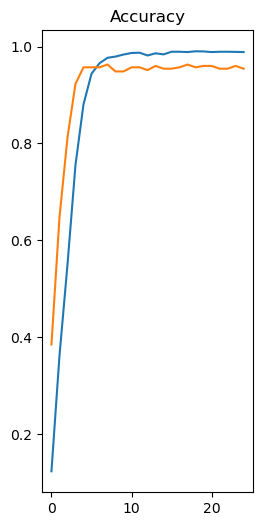

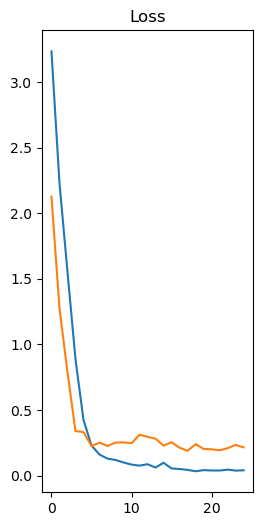

In [59]:
epochs_range = range(epochs_size)
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

epochs_range = range(epochs_size)
plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

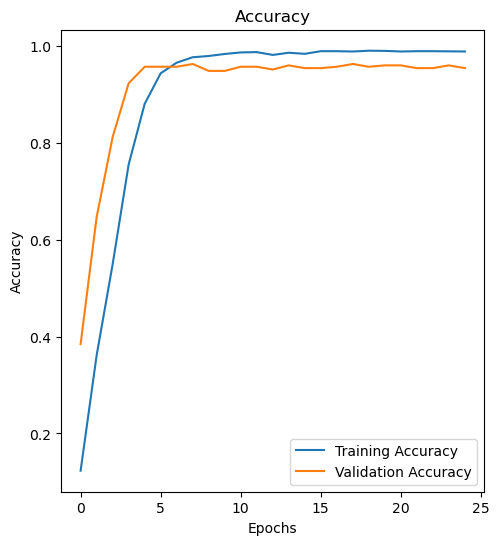

In [60]:
epochs_range = range(epochs_size)

# Define a single figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [61]:
image = 'apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [62]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 167ms/step


In [63]:
score = tf.nn.softmax(predict)

In [67]:
print('Veg/Fruit in range is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in range is apple with accuracy of 99.93


In [76]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [77]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 40ms/step


In [78]:
score = tf.nn.softmax(predict)

In [79]:
print('Veg/Fruit in range is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in range is corn with accuracy of 96.36


In [80]:
model.save('Image_classify.keras')